# Image Classification using fast.ai


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 1. Create folders in Google Drive

There are 48 image cards in the card game. Since 48 cards are not enough to train a deep learning model, I created 100 copies of each card.

In [0]:
import shutil, os

In [0]:
general_path = '/content/drive/My Drive/AI_Model'

In [0]:
folder_to_create='Card_Images_fastai'
directory_to_create = general_path+'/'+folder_to_create

try: # to create new folder to store all images generated
    os.mkdir(directory_to_create)
except OSError:
    print ("Creation of the directory %s failed" % directory_to_create)
else:
    print ("Successfully created the directory %s " % directory_to_create)

Successfully created the directory /content/drive/My Drive/AI_Model/Card_Images_fastai 


In [0]:
folders = ['01 Professionals','02 Incident','03 Global Cards','04 Asset Cards','05 Trust and Insurance']
raw_folder = 'Raw_Card_Images'
raw_path = general_path+'/'+raw_folder
image_folder = 'Card_Images_fastai'
image_path = general_path+'/'+image_folder

big_img_list = []
for folder in folders:
  directory = raw_path+'/'+folder
  # print(directory)

  img_list = []
  for filename in os.listdir(directory):
    img_card = filename[:-4]
    img_list.append(img_card)
  big_img_list.extend(img_list)
print(len(big_img_list),big_img_list)

48 ['01 Real Estate Agent', '04 Financial Planner', '05 Economist', '02 Stock Broker', '06 Politician', '08 Entrepreneur', '07 Journalist', '03 Banker', '09 Divorce', '10 Corruption', '12 Critical Illness', '14 Illness', '11 Vacation', '13 Accident', '15 Baby', '16-Retrenchment', '17 Pay Raise', '20 Natural Disaster', '21 Interest Rate Rises', '30 Property Market Crash', '22 Interest Rate Falls', '23 Government Raises Tax', '29 Property Bubble', '25 Partisan Politics', '24 Government Lowers Tax', '26 Political Turmoil', '28 Stock Fever', '27 Debt Crisis', '31 Stock Market Crash', '36 Information Overload', '35 Land Rezoning', '34 Credit rating Downgrade', '18 Hot Money', '37 New Technology', '19 Government Bailout', '32 Inflation', '33 Stock Panic', '45 Property', '44 Stock', '40 Convertible Bond', '46 Bond', '39 Undeveloped Land', '41 Junk Bond', '43 Dividend Stock', '42 Growth Stock', '38 Hotel', '48 Insurance', '47 Trust Fund']


In [0]:
folders = ['01 Professionals','02 Incident','03 Global Cards','04 Asset Cards','05 Trust and Insurance']
raw_folder = 'Raw_Card_Images'
raw_path = general_path+'/'+raw_folder
image_folder = 'Card_Images_fastai'
image_path = general_path+'/'+image_folder

for folder in folders:
  directory = raw_path+'/'+folder
  # print(directory)

  for filename in os.listdir(directory):
    img_card = filename[:-4]
    directory_to_create = image_path+'/'+img_card

    # try: # to create new folders in image_folder
    #     os.mkdir(directory_to_create)
    # except OSError:
    #     print ("Creation of the directory %s failed" % directory_to_create)
    # else:
    #     print ("Successfully created the directory %s " % directory_to_create)

    n=0
    for i in range(100): # create 100 copies per image card
      n+=1
      shutil.copy(directory+'/'+filename,directory_to_create+'/'+img_card+'_'+str(n)+'.jpeg') # copy image (filename) to destination folder 
    print('Successfully copied 100 %s to %s ' % (filename, directory_to_create))

Successfully copied 100 01 Real Estate Agent.png to /content/drive/My Drive/AI_Model/Card_Images_fastai 
Successfully copied 100 04 Financial Planner.png to /content/drive/My Drive/AI_Model/Card_Images_fastai 
Successfully copied 100 05 Economist.png to /content/drive/My Drive/AI_Model/Card_Images_fastai 
Successfully copied 100 02 Stock Broker.png to /content/drive/My Drive/AI_Model/Card_Images_fastai 
Successfully copied 100 06 Politician.png to /content/drive/My Drive/AI_Model/Card_Images_fastai 
Successfully copied 100 08 Entrepreneur.png to /content/drive/My Drive/AI_Model/Card_Images_fastai 
Successfully copied 100 07 Journalist.png to /content/drive/My Drive/AI_Model/Card_Images_fastai 
Successfully copied 100 03 Banker.png to /content/drive/My Drive/AI_Model/Card_Images_fastai 
Successfully copied 100 09 Divorce.png to /content/drive/My Drive/AI_Model/Card_Images_fastai 
Successfully copied 100 10 Corruption.png to /content/drive/My Drive/AI_Model/Card_Images_fastai 
Successful

## 2. Import modules for fastai

In [0]:
from fastai import *
from fastai.vision import *
import numpy as np

In [0]:
# print(image_path)
path='/content/drive/My Drive/AI_Model/Card_Images_fastai'

## 3. Create dataset of 100 images per image card

I used fast.ai inbuilt get_transforms() method to create variations of the original images. I varied these parameters:

- flip_vert: flip images vertically and rotate 90 degrees
- max_rotate: set rotation angle
- max_zoom: set zoom level
- max_lighting: set brightness level
- max_warp: set symmetric warp

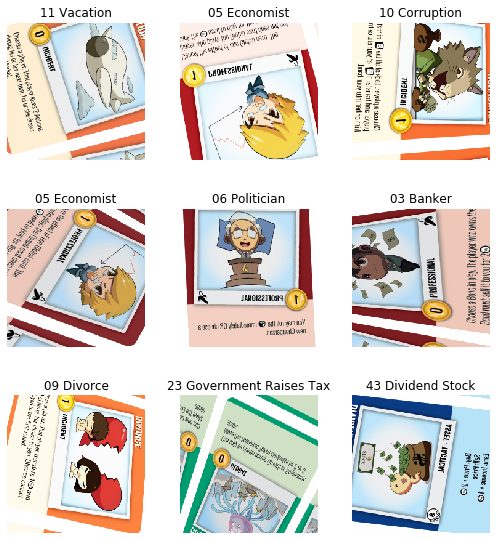

In [0]:
np.random.seed(42)
# create image data bunch
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(flip_vert=True,max_rotate=45.0,max_zoom=0.9,max_lighting=0.3,max_warp=0.3), size=224, num_workers=4).normalize(imagenet_stats)
data.show_batch(rows=3,figsize=(7,8))

## 4. Train pre-trained model with dataset

In [0]:
# use a model trained on a large ImageNet dataset
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 73.3MB/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.041096,0.016718,0.000000,25:15
1,0.557881,0.005528,0.000000,24:49
2,0.188694,0.000457,0.000000,24:44
3,0.078569,0.000363,0.000000,24:44


In [0]:
learn.save('stage-1b')

In [0]:
learn.load('stage-1b')

Learner(data=ImageDataBunch;

Train: LabelList (3840 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
01 Real Estate Agent,01 Real Estate Agent,01 Real Estate Agent,01 Real Estate Agent,01 Real Estate Agent
Path: /content/drive/My Drive/AI_Model/Card_Images_fastai;

Valid: LabelList (960 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
08 Entrepreneur,37 New Technology,35 Land Rezoning,36 Information Overload,01 Real Estate Agent
Path: /content/drive/My Drive/AI_Model/Card_Images_fastai;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=Fal

### Fine-tune model

In [0]:
learn.unfreeze()

In [0]:
lr_find(learn)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


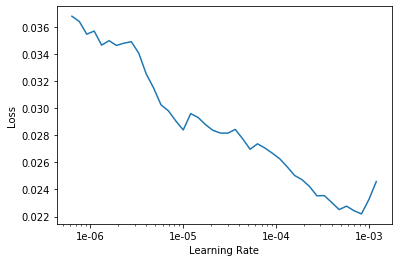

In [0]:
learn.recorder.plot()

In [0]:
# fine-tune model by setting learning rate. 
# LR is determined by looking at the recorder plot and picking the LR that resulted in the steepest decrease in loss
learn.fit_one_cycle(5,slice(3e-6,3e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.028810,0.000289,0.000000,25:30
1,0.022309,0.000179,0.000000,25:12
2,0.016404,0.000109,0.000000,25:04
3,0.012557,0.000107,0.000000,24:56
4,0.009834,0.000100,0.000000,23:21


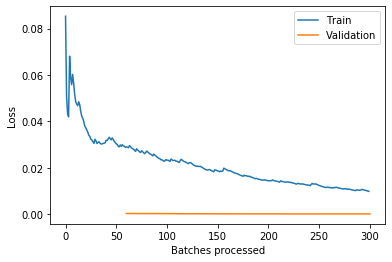

In [0]:
learn.recorder.plot_losses()

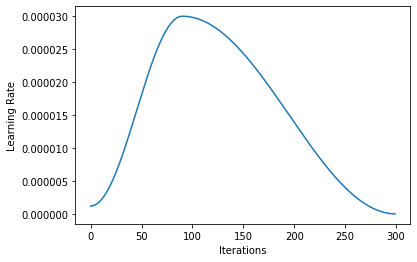

In [0]:
learn.recorder.plot_lr()

In [0]:
learn.save('stage-2b')

After testing with this model, there were 5 errors. 
- Banker predicted as 43 Dividend Stock
- Stock Market Crash predicted as 23 Government Raises Tax
- Stock Panic predicted as 45 Property
- Inflation predicted as 31 Stock Market Crash
- Government Lowers Tax predicted as 16 Retrenchment

Here, the zoomed-out images have a higher tendency of being wrongly classified. As such I am creating a new ImageDataBunch with zoomed out images to fine-tune the model.

## 5. Create new dataset with zoomed out images and load the previous model to train with new dataset

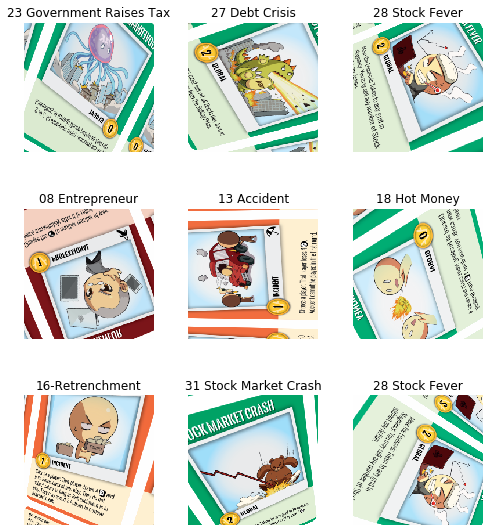

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(flip_vert=True,max_rotate=30.0,max_zoom=0.5,max_lighting=0.1,max_warp=0.3), size=224, num_workers=4).normalize(imagenet_stats)
data.show_batch(rows=3,figsize=(7,8))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.load('stage-2b')

Learner(data=ImageDataBunch;

Train: LabelList (3840 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
01 Real Estate Agent,01 Real Estate Agent,01 Real Estate Agent,01 Real Estate Agent,01 Real Estate Agent
Path: /content/drive/My Drive/AI_Model/Card_Images_fastai;

Valid: LabelList (960 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
08 Entrepreneur,37 New Technology,35 Land Rezoning,36 Information Overload,01 Real Estate Agent
Path: /content/drive/My Drive/AI_Model/Card_Images_fastai;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=Fal

In [0]:
lr_find(learn)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


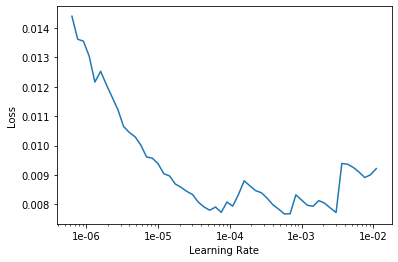

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5,slice(3e-6,3e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.008150,0.000124,0.000000,19:28
1,0.007868,0.000116,0.000000,18:56
2,0.008735,0.000112,0.000000,17:48
3,0.010676,0.000096,0.000000,18:25
4,0.010108,0.000112,0.000000,19:30


In [0]:
learn.save('stage-3b')

There were 4 errors this time:
- Banker predicted as 43 Dividend Stock
- Stock Panic predicted as 27 Debt Crisis
- Inflation predicted as 31 Stock Market Crash
- Undeveloped Land predicted as 43 Dividend Stock

A commonality between these models is dark zoomed out images. Thus, I created a new ImageDataBunch with darker images and trained the model again.

## 6. Create new dataset with darker images and load the previous model to train with new dataset

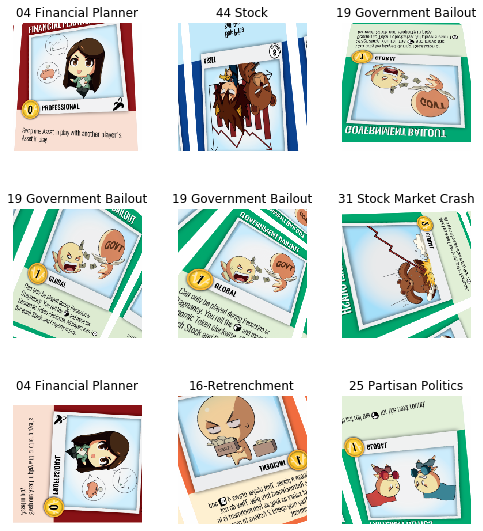

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(flip_vert=True,max_rotate=30.0,max_zoom=0.3,max_lighting=-0.1,max_warp=0.3), size=224, num_workers=4).normalize(imagenet_stats)
data.show_batch(rows=3,figsize=(7,8))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.load('stage-3b')

Learner(data=ImageDataBunch;

Train: LabelList (3840 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
01 Real Estate Agent,01 Real Estate Agent,01 Real Estate Agent,01 Real Estate Agent,01 Real Estate Agent
Path: /content/drive/My Drive/AI_Model/Card_Images_fastai;

Valid: LabelList (960 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
08 Entrepreneur,37 New Technology,35 Land Rezoning,36 Information Overload,01 Real Estate Agent
Path: /content/drive/My Drive/AI_Model/Card_Images_fastai;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=Fal

In [0]:
lr_find(learn)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


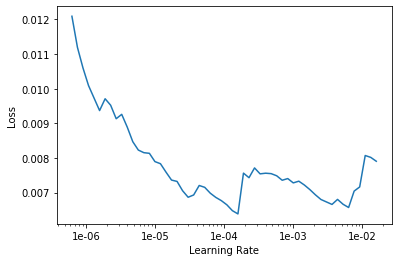

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2,slice(3e-6,3e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.010632,0.000099,0.000000,25:30
1,0.008641,0.000092,0.000000,25:27


In [0]:
learn.save('stage-4b2')

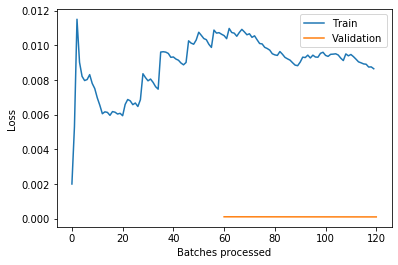

In [0]:
learn.recorder.plot_losses()

## 6. Test model

The ImageDataBunch were created by varying the png image files with the get_transforms() function. To test the accuracy of the model, we test it against the photographed version of the cards.

In [0]:
learn.load('stage-4b2')

Learner(data=ImageDataBunch;

Train: LabelList (3840 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
01 Real Estate Agent,01 Real Estate Agent,01 Real Estate Agent,01 Real Estate Agent,01 Real Estate Agent
Path: /content/drive/My Drive/AI_Model/Card_Images_fastai;

Valid: LabelList (960 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
08 Entrepreneur,37 New Technology,35 Land Rezoning,36 Information Overload,01 Real Estate Agent
Path: /content/drive/My Drive/AI_Model/Card_Images_fastai;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=Fal

In [0]:
from IPython.display import Image
import re

In [0]:
test_directory = '/content/drive/My Drive/AI_Model/Raw_Test_all'
for image in os.listdir(test_directory):
  image_path = test_directory + '/' + image
  # print(image_path)
  display(Image(filename=image_path, width=224, height=224))
  img = open_image(image_path)
  pred_class, pred_idx, outputs = learn.predict(img)
  print('Predicted image is %s ' % pred_class)
  # print('Precitions is %s ' % outputs)
  print()

This is an improvement from the earlier model. 3 errors this time:
- Banker predicted as 43 Dividend Stock
- Stock Panic predicted as 45 Property
- Inflation predicted as 31 Stock Market Crash

These cards were wrongly predicted in the previous model as well. Since these image are rather zoomed out, one way is give the instructions "please rescan the card" on the mobile application for the users to take a closer shot. 

Now, the next step is to deploy the model onto a mobile application.

In [0]:
learn.export()

In [0]:
learn.export(file = 'export-4b2.pkl')

In [0]:
import torch
torch.save(learn.model.state_dict(), '/content/drive/My Drive/AI_Model/Card_Images_fastai/py-4b2.pth')